In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

# 로지스틱 회귀

## 선형으로 분리가 가능한 데이터

아래의 그래프에서 positive (1) 데이터를 파란색 마커로 negative(0) 데이터를 노란색 마커로 표시했습니다.

이 두 부분은 직선으로 나눠질 수 있어보입니다.

로지스틱의 크로스 엔트로피를 사용한 비용함수를 최소화하는 훈련을 반복해서 선형 분리를 해보겠습니다.


In [2]:
data = np.loadtxt('../data/ex2data1.txt', delimiter=',') 
x = data[:,0:-1]; print(x.shape)  #X = data[:, 0:2]
y = data[:,[-1]]; print(y.shape)  #y = data[:, 2]

(100, 2)
(100, 1)


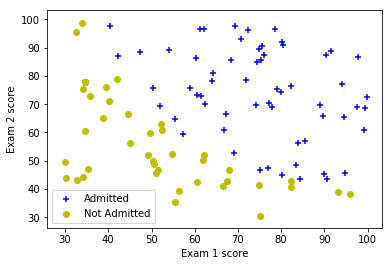

In [3]:
pos = np.where(y == 1)
neg = np.where(y == 0)
plt.scatter(x[pos, 0], x[pos, 1], marker='+', c='b')
plt.scatter(x[neg, 0], x[neg, 1], marker='o', c='y')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted', 'Not Admitted'])
plt.show()

raw 데이터를  직접 다루는 것 보다. 여러개의 피처를 갖는 데이터를 다룰 때는 스케일링을 하는 것이 머신러닝할 때는 여러모로 효율이 좋은 경우가 많습니다.

사실 이 실습에서는 스케일링을 하지 않으면 최적화 함수가 제대로 작동하지 않았습니다.

스케일러에는 보통 표준정규분포를 사용하는 StandardScaler 를 사용합니다.

모듈을 사용하지 않는 경우에는 MinMaxScaler 를 직접 코딩해서 사용하기도 하는데 역 스케일링도 해야하기 때문에 모듈을 사용하는 것이 편하고 그럴 바에는 StandardScaler 를 사용 안 할 이유가 없습니다.

스케일러를 사용하면 큰 범위에서 존재했던 데이터 값들을 대부분 [-2,2] 구간으로 모을 수 있습니다.

스케일링을 한 데이터로 훈련을 시키기 때문에 가중치와 바이어스 파라미터도 스케일링에 의존하게 됩니다.

스케일링을 사용하면 훈련을 완료한 후에 회귀 직선을 그려볼 땐데 그 과정이 조금 복잡해집니다.

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)

In [45]:
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([2,1]), 'weight')
b = tf.Variable(tf.random_normal([1]), 'bias')

hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

prediction = tf.cast(hypothesis >= 0.5, dtype=tf.float32)

accuracy = tf.reduce_mean(tf.cast( tf.equal(prediction, Y), dtype=tf.float32 ))


cost_ = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(1001):
        cost_val, _ = sess.run([cost, optimizer], feed_dict={X: x_scaled, Y: y})
        cost_.append(cost_val)
        if step % 200 == 0:
            print(step, cost_val)
    W_val, b_val, acc = sess.run([W, b, accuracy],
                       feed_dict={X: x_scaled, Y: y})
    print("Accuracy: ", acc)


0 0.427123
200 0.362732
400 0.327391
600 0.305663
800 0.29088
1000 0.280012
Accuracy:  0.89


In [19]:
W_val, b_val

(array([[ 1.10815036],
        [ 1.18459725]], dtype=float32), array([ 0.3800492], dtype=float32))

### 로지스틱 회귀 훈련 결과

1000 번의 훈련을 한 결과 정확도가 0.89 가 나왔습니다. 종 100 개의 샘플이 있으므로 11개 가 잘 못 분류된 것입니다.

데이터와 회귀 직선을 그려서 확인해보겠습니다.

In [39]:
scaler_x1 = StandardScaler().fit(x[:,0].reshape(-1,1))
scaler_x2 = StandardScaler().fit(x[:,1].reshape(-1,1))

x_lin = np.linspace(np.min(x[:,0]) , np.max(x[:,0]), 100)

x_lin_scaled = scaler_x1.transform(x_lin.reshape(-1,1))

y_pred = -(x_lin_scaled * W_val[0] + b_val) / W_val[1]

y_pred = scaler_x2.inverse_transform(y_pred.reshape(-1,1))

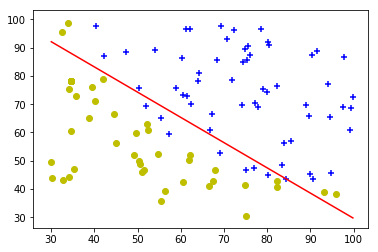

In [46]:
# 2D plot with regression line

pos = np.where(y == 1)
neg = np.where(y == 0)
plt.scatter(x[pos, 0], x[pos, 1], marker='+', c='b')
plt.scatter(x[neg, 0], x[neg, 1], marker='o', c='y')
plt.plot(x_lin, y_pred, 'r-')
plt.show()
    